In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Limpieza de los Datos

In [3]:
df = pd.read_csv('student_performance_prediction.csv')

In [4]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [5]:
df.shape

(40000, 7)

In [6]:
df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
df['Passed'] = df['Passed'].replace({'Yes': 1, 'No': 0})

C:\Users\Administrador\AppData\Local\Temp\ipykernel_24116\2729213649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
C:\Users\Administrador\AppData\Local\Temp\ipykernel_24116\2729213649.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Passed'] = df['Passed'].replace({'Yes': 1, 'No': 0})


In [7]:
# Ver la cantidad de veces que aparece cada valor en la columna 'A'
conteo_valores = df['Parent Education Level'].value_counts()

print(conteo_valores)

Parent Education Level
Bachelor       7685
High School    7675
Doctorate      7610
Associate      7604
Master         7426
Name: count, dtype: int64


In [8]:
# Definir el mapeo manual de categorías a valores específicos
mapeo = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5}

# Aplicar el mapeo a la columna
df['Parent Education Level'] = df['Parent Education Level'].map(mapeo)

In [9]:
df.drop('Student ID', axis= 1, inplace=True)

In [10]:
df.isna().sum()

Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         38005 non-null  float64
 1   Attendance Rate                              38008 non-null  float64
 2   Previous Grades                              38006 non-null  float64
 3   Participation in Extracurricular Activities  38000 non-null  float64
 4   Parent Education Level                       38000 non-null  float64
 5   Passed                                       38000 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB


In [12]:
df.dropna(subset=['Passed'], inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_24116\4144953704.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


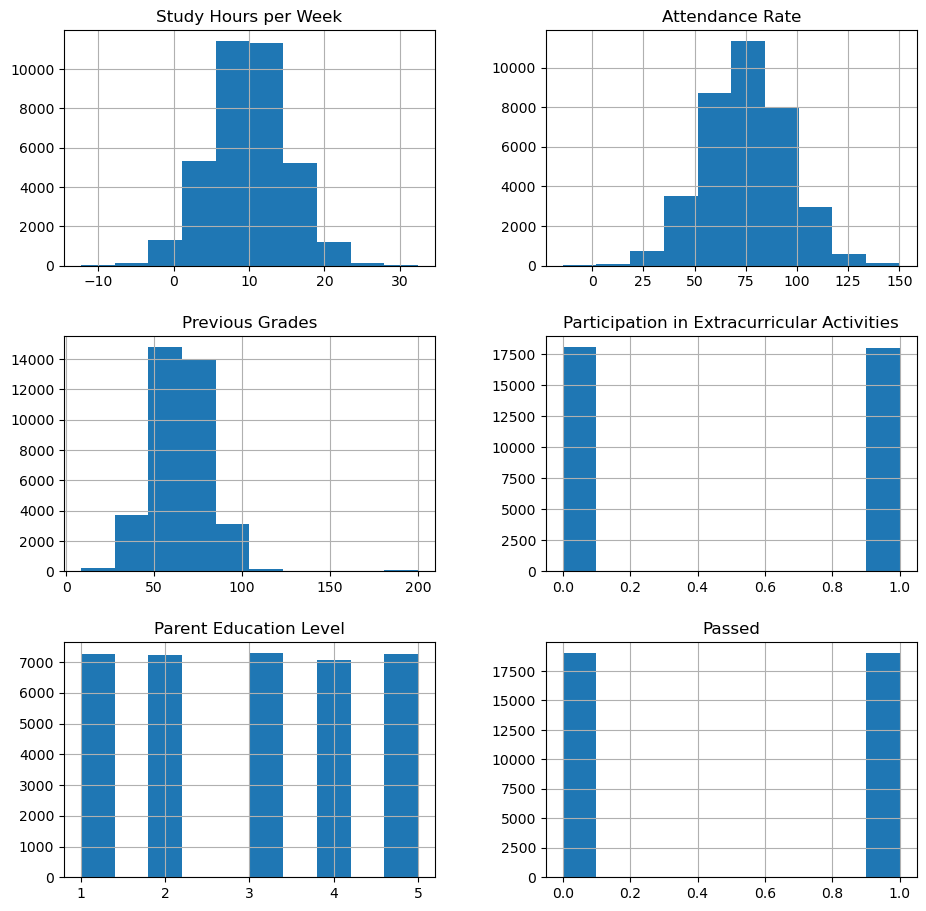

In [13]:
fig, ax = plt.subplots(figsize=(11,11))
df.hist(ax=ax)
plt.show()

In [14]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
count,36095.000000,36112.000000,36123.000000,36098.000000,36102.000000,38000.000000
mean,9.963665,75.269913,65.447142,0.499529,2.994128,0.500289
std,5.031397,20.426990,16.531608,0.500007,1.415689,0.500006
min,-12.300000,-14.300000,8.300000,0.000000,1.000000,0.000000
25%,6.600000,61.500000,55.100000,0.000000,2.000000,0.000000
50%,10.000000,75.200000,65.200000,0.000000,3.000000,1.000000
75%,13.400000,88.800000,75.200000,1.000000,4.000000,1.000000
max,32.400000,150.200000,200.000000,1.000000,5.000000,1.000000


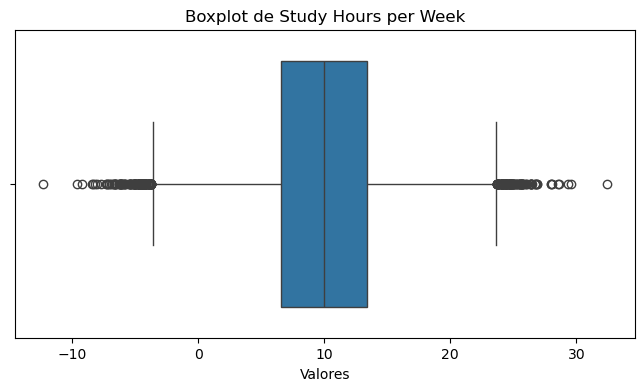

In [15]:
col = 'Study Hours per Week'
# Crear el boxplot para una sola columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[col])
plt.title(f'Boxplot de {col}')
plt.xlabel('Valores')
plt.show()

In [16]:
df = df.loc[(df['Study Hours per Week'] > 0)].reset_index(drop=True)

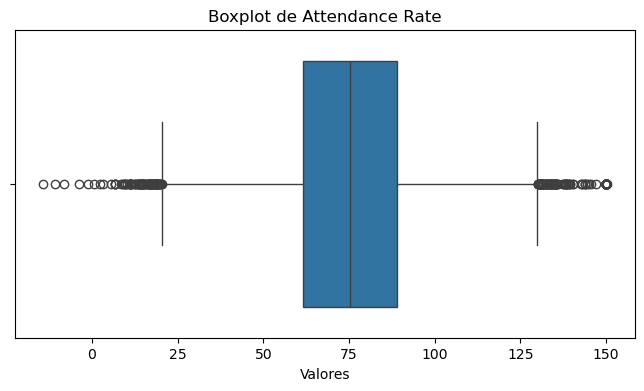

In [17]:
col = 'Attendance Rate'
# Crear el boxplot para una sola columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[col])
plt.title(f'Boxplot de {col}')
plt.xlabel('Valores')
plt.show()

In [18]:
df = df.loc[(df['Attendance Rate'] > 20 ) & (df['Attendance Rate'] < 100)].reset_index(drop=True)

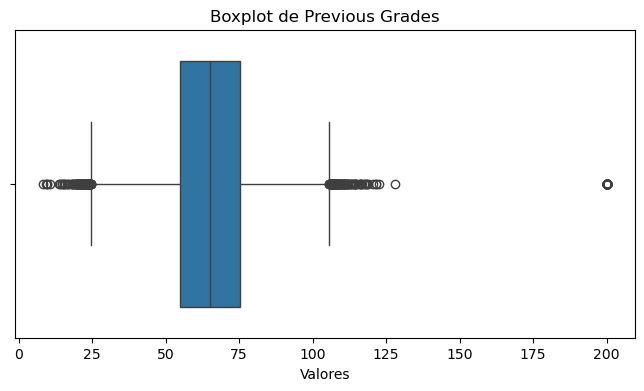

In [19]:
col = 'Previous Grades'
# Crear el boxplot para una sola columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[col])
plt.title(f'Boxplot de {col}')
plt.xlabel('Valores')
plt.show()

In [20]:
df = df.loc[(df['Previous Grades'] > 0 ) & (df['Previous Grades'] < 100)].reset_index(drop=True)

In [21]:
df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,9.3,95.3,60.6,0.0,1.0,0.0
1,17.6,76.8,62.4,1.0,3.0,0.0
2,8.8,89.3,72.7,0.0,4.0,0.0
3,8.8,73.8,69.3,1.0,1.0,1.0
4,17.9,38.6,93.6,0.0,5.0,1.0


In [22]:
df.isna().sum()

Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    1411
Parent Education Level                         1376
Passed                                            0
dtype: int64

In [23]:
df.shape

(27825, 6)

In [24]:
PEL_values = [1, 2, 3, 4, 5]
PEA_values = [0,1]

# Función para rellenar NaN con valores aleatorios de una lista
def fill_na_with_specific_values(df, column, values_list):
    # Número de NaN en la columna
    num_na = df[column].isna().sum()
    
    # Elegir aleatoriamente valores de la lista para reemplazar NaN
    random_values = np.random.choice(values_list, size=num_na)
    
    # Reemplazar NaN con los valores elegidos
    df.loc[df[column].isna(), column] = random_values

# Aplicar la función a la columna 'Values'
fill_na_with_specific_values(df, 'Participation in Extracurricular Activities', PEA_values)
fill_na_with_specific_values(df, 'Parent Education Level', PEL_values)

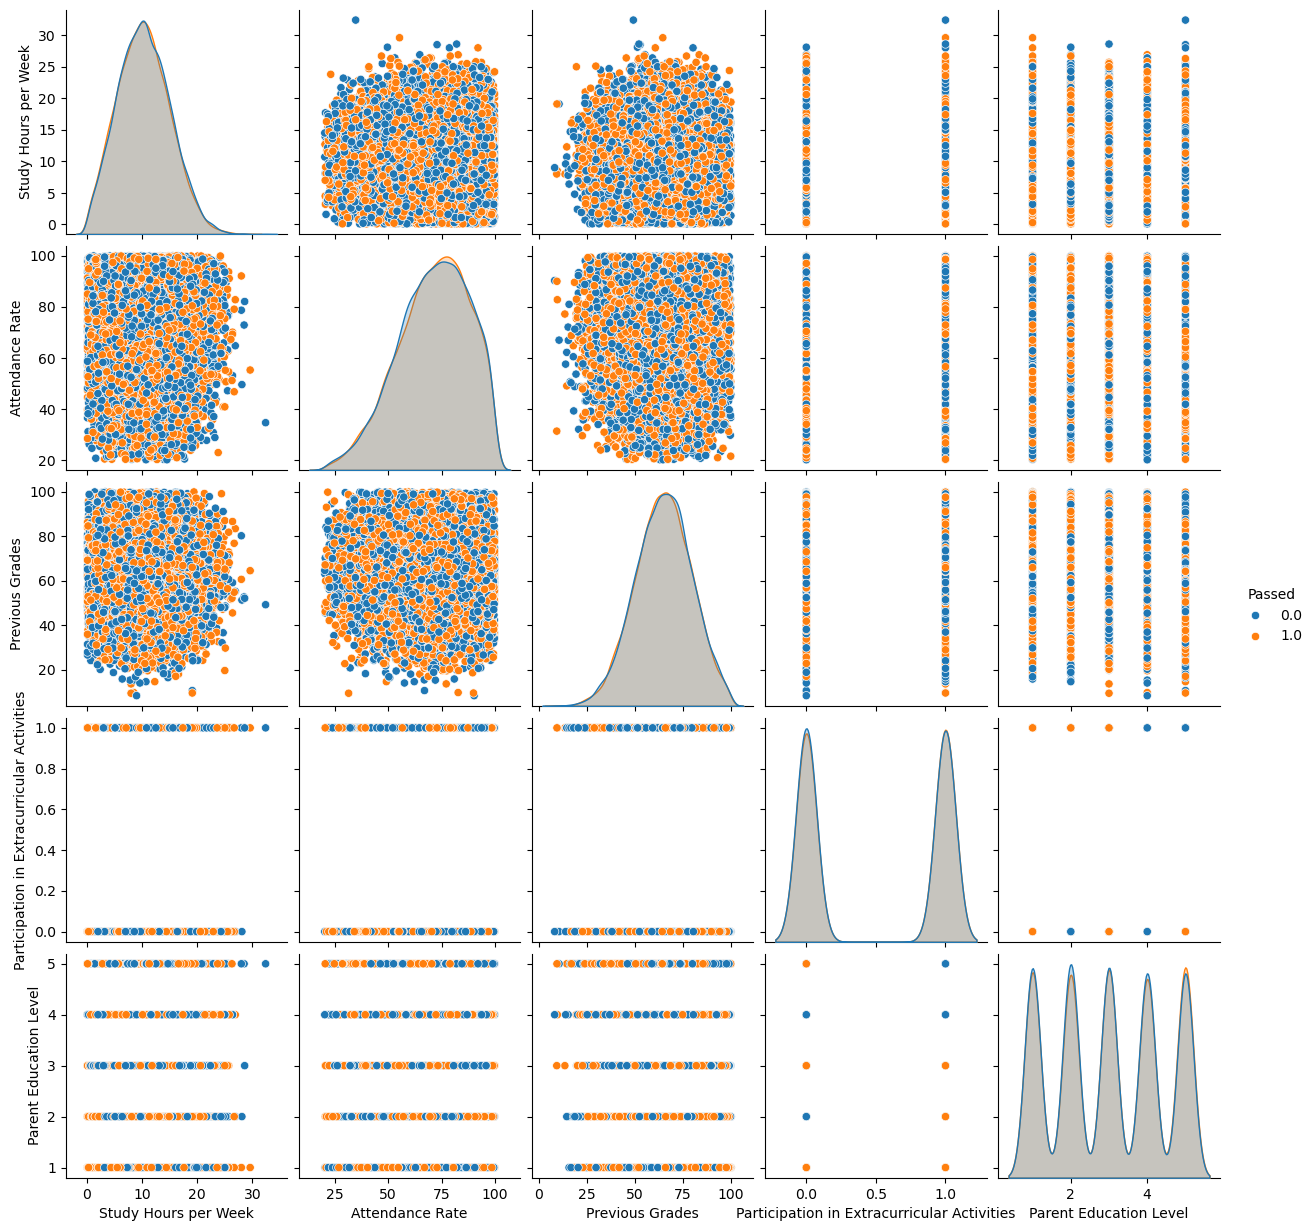

In [25]:
# Pairplot to observe relationships
sns.pairplot(df, hue='Passed')
plt.show()

In [26]:
#df.to_csv('StudentP_clean.csv', index= False)